In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [34]:
df = pd.read_csv('Ames Housing Data Encoding.csv')

In [35]:
df.head(10)

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin Type 1,Total Bsmt SF,Heating QC,1st Flr SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,6,1960,1960,112.0,2,3,4,1080.0,1,1656,...,0,0,0,0,1,0,0,0,1,0
1,5,1961,1961,0.0,2,3,3,882.0,2,896,...,0,0,0,0,1,0,0,0,1,0
2,6,1958,1958,108.0,2,3,5,1329.0,2,1329,...,0,0,0,0,1,0,0,0,1,0
3,7,1968,1968,0.0,3,3,5,2110.0,4,2110,...,0,0,0,0,1,0,0,0,1,0
4,5,1997,1998,0.0,2,4,6,928.0,3,928,...,0,0,0,0,1,0,0,0,1,0
5,6,1998,1998,20.0,2,3,6,926.0,4,926,...,0,0,0,0,1,0,0,0,1,0
6,8,2001,2001,0.0,3,4,6,1338.0,4,1338,...,0,0,0,0,1,0,0,0,1,0
7,8,1992,1992,0.0,3,4,5,1280.0,4,1280,...,0,0,0,0,1,0,0,0,1,0
8,8,1995,1996,0.0,3,4,6,1595.0,4,1616,...,0,0,0,0,1,0,0,0,1,0
9,7,1999,1999,0.0,2,3,1,994.0,3,1028,...,0,0,0,0,1,0,0,0,1,0


In [49]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from sklearn.linear_model import Lasso

In [51]:
model = Lasso(alpha=100)

In [52]:
model.fit(X_train, y_train)

Lasso(alpha=100)

In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
mean_squared_error(y_test,y_pred)

520749539.51262295

In [56]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [57]:
100*RMSE/df['SalePrice'].mean()

12.87177000471616

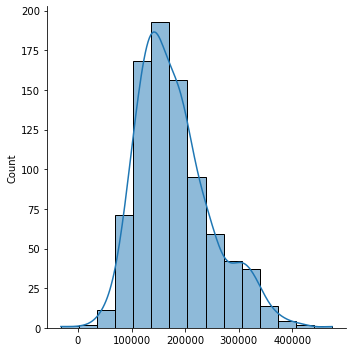

In [58]:
sns.displot(y_pred,bins=15,kde=True)

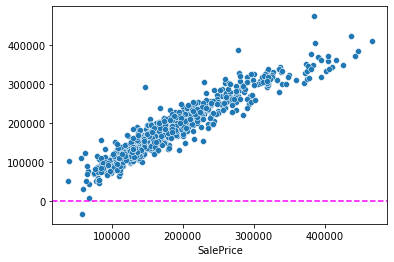

In [59]:
sns.scatterplot(x=y_test,y=y_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

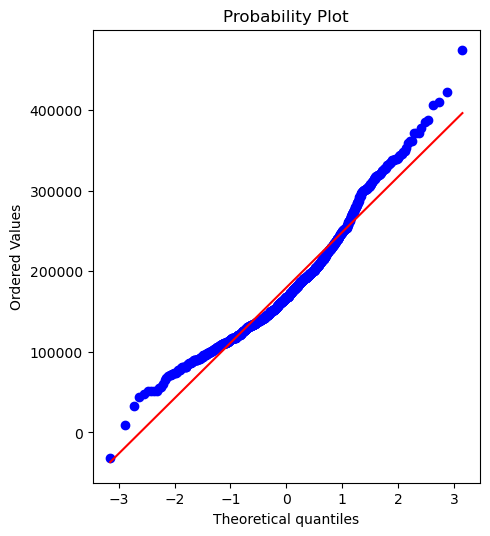

In [60]:
fig,ax = plt.subplots(figsize=(5,6),dpi=100)

_=sp.stats.probplot(y_pred,plot=ax)

In [65]:
model.coef_

array([ 1.03968544e+04,  5.02529671e+03,  4.09415434e+03,  4.57780355e+03,
        3.93173752e+03,  3.58632646e+03,  6.72540594e+03,  6.06183938e+03,
        1.41525150e+03,  3.09061069e+03,  2.38838393e+04, -1.14108530e+03,
        5.08397663e+03, -2.46433769e+03,  4.26091613e+03, -5.33900713e+02,
       -1.53223387e+03,  2.00140909e+03,  2.75747501e+03,  5.34041426e+03,
       -0.00000000e+00, -4.92465475e+02,  4.01922386e+02,  1.69552571e+03,
       -0.00000000e+00, -3.19803533e+02,  2.91354920e+03,  1.27643748e+03,
       -1.66645763e+02,  0.00000000e+00, -7.60622863e+02,  1.78410701e+03,
       -3.97728084e+02,  5.63750527e+02,  3.07119950e+02,  6.97611684e+02,
        1.60196345e+03,  7.46413914e+02,  1.01932200e+03, -8.89568215e+02,
        3.62606875e+03, -3.05339382e+02, -1.38555771e+03,  4.65231302e+02,
        3.74250200e+03,  0.00000000e+00,  2.42472759e+01,  0.00000000e+00,
       -0.00000000e+00, -8.54132460e+01,  1.17080853e+03, -9.94614148e+02,
        3.39694797e+03,  

**Retraining Full Data**

In [20]:
from sklearn.linear_model import LinearRegression

In [24]:
final_model = LinearRegression()

In [26]:
final_model.fit(X,y)

LinearRegression()

In [27]:
y_hat = final_model.predict(X)

In [28]:
y_hat

array([213715.13071876, 109549.41835864, 159586.60632598, ...,
       128911.51086628, 173650.69115345, 209365.61253402])

In [29]:
residuals = y_hat - y

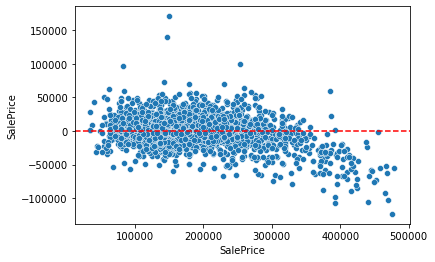

In [30]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0,color='r',linestyle='--')

<AxesSubplot:ylabel='SalePrice'>

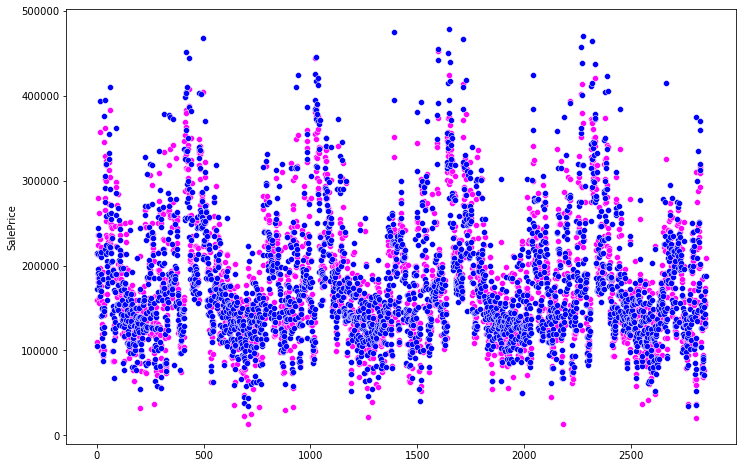

In [31]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(y_hat)),y=y_hat,color='magenta')
sns.scatterplot(x=range(len(y)),y=y,color='blue')

In [32]:
final_model.coef_

array([ 8.30936300e+03,  1.87891048e+02,  1.64722618e+02,  2.77774950e+01,
        6.45042419e+03,  4.22032849e+03,  3.25286439e+03,  1.34133180e+01,
        1.64176848e+03,  9.86085032e+00,  5.42824050e+01, -3.36908988e+03,
        7.90408437e+03, -1.56792040e+03,  7.24953564e+03, -5.21183309e+02,
       -6.81517590e+01,  2.17248181e+03,  4.56683292e+03,  2.58446381e+01,
        1.32015185e+04,  2.19804838e+04,  1.55318205e+04,  1.39144123e+04,
        9.26733840e+03, -8.73464973e+03,  1.36509917e+04,  9.85443043e+03,
        4.82285094e+02, -3.29492086e+04, -1.34200333e+04,  5.94534629e+03,
       -2.73887808e+03,  4.30540883e+03,  8.75135700e+01,  6.57470588e+03,
        1.88378337e+04,  5.63874096e+03,  6.63607547e+03, -6.75646724e+03,
        1.73537086e+04, -3.50185844e+03, -7.91045759e+03,  8.53062660e+03,
        1.19067108e+05,  1.19806274e+03,  2.97827330e+03, -1.19256113e+02,
       -1.94286462e+03, -5.05725347e+03,  2.08825143e+04, -9.55370882e+03,
        1.94742560e+04,  

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

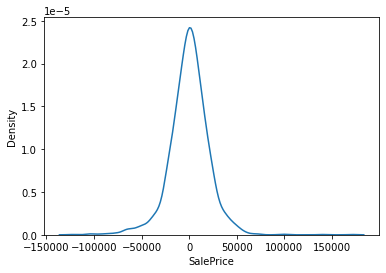

In [33]:
sns.kdeplot(residuals)